__<p style="font-size:180%;"> Pythonøving 4 - TKT4118/MEKT1101 Mekanikk 1</p>__

__Snølast 1__

****

Figuren viser en prinsippskisse av et flatt tak på et uthus i en hyttegrend. Uthuset har lang utstrekning ut av planet, og selve takflaten består av langsgående takbord. Disse takbordene holdes oppe av takbjelker og stendere som har senteravstand c/c 2,0 m.  

Det har vært en snørik vinter, men litt før påske satte det inn med mildvær og kombinasjon av vind og sludd. Snøen ble dermed våt og fuktig – og hytteeieren tok seg en tur til fjells for å sjekke ståa på taket til uthuset. Han tok et bilde før han måkte av taket. Vel tilbake i byen var han nysgjerrig på å få vite ca hvor stor snølast det var på taket. Figuren ovenfor er tegnet i målestokk, dvs. at maksimal snødybde på taket var ca 1,3 m. Fra bildet målte han den vertikale snødybden $h$ (i meter) for hver halve løpemeter langs taket (dvs. som funksjon av koordinaten $x$). Disse måledataene skrev han inn i fila snødybde.txt.


****
# Definisjon av parametre
Vi begynner med å importere verktøyene for beregning (NumPy) og plotting (Matplotlib) og gir de kortere kallenavn. Husk å kjør kodecellene!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

I oppgaven og figuren under er målene gitt i meter og kg. La oss definere noen konstanter.

In [ ]:
g              = 9.82        # [m/s^2] Gravitasjonskonstant
rho            = 400.0        # [kg/m^3] Tetthet for våt snø
stenderavstand = 2.0         # senter-senter-avstanden mellom takbjelkene

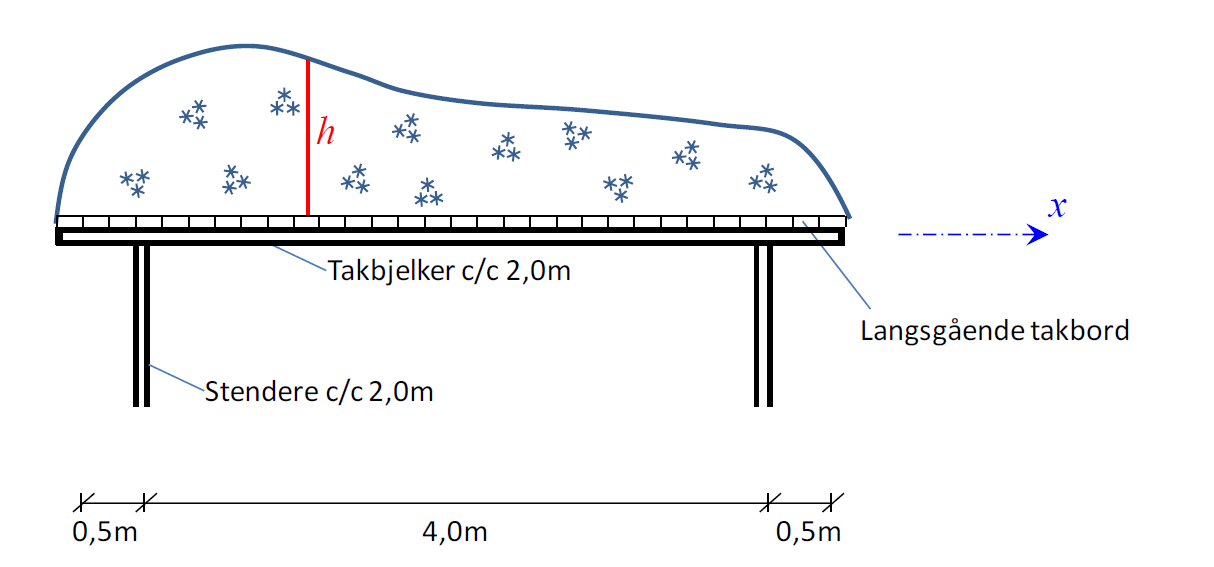

***
Nå kan vi lese filen som inneholder snødataen. Dataen er lagret på serveren i en tekstfil med navn "snødybde.txt" og vi kan bruke en funksjon som heter  `np.genfromtxt("filnavn")` til å lese fila inn i et array. Arrayet har to kolonner, hvor den ene inneholder x-koordinatene, $x$, til målingene og den andre inneholder målingene av snødybde, $h$.

In [3]:
sno_data = np.genfromtxt("snodybde.txt")  # Les tekstfilen med snodata
# Filen ligger på BB, og må lastes ned derfra og deretter lastes opp i deres egen "Files"-tab her i Jupyter

Linjelasten q for alle x-verdiene er: [    0.   7463.2  9820.  10212.8  9427.2  8641.6  8248.8  7463.2  6677.6
  4320.8     0. ]


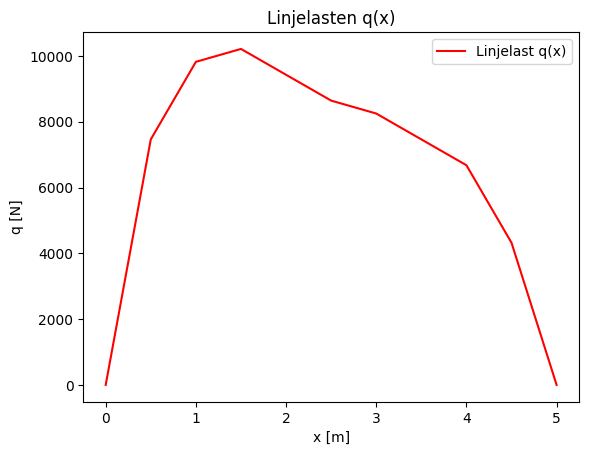

In [4]:
def q(x):
    return rho*x[:,1]*stenderavstand*g

print(f"Linjelasten q for alle x-verdiene er: {q(sno_data)}")

plt.plot(sno_data[:,0], q(sno_data), color='red', label="Linjelast q(x)")
plt.xlabel("x [m]")
plt.ylabel("q [N]")
plt.legend()
plt.title('Linjelasten q(x)')
plt.show()

<div class="alert alert-block alert-info">
<details>
    
<b><summary>Trykk her for tips</summary></b> 

```python
# For å velge første kolonne i et array:
forste_kolonne = gammelt_array[:, 0]

# For å plotte linjer med punkter som markerer datapunktene, bruk:
plt.plot(xdata, ydata, '-o', label="navn på kurve")
```


</details>
</div>

***
# Trapesmetoden

Videre er det ønsket å finnet snølastens resultantkraft. Det gjøres typisk ved å integrere linjelasten over hele takets lengde. Her har vi derimot ingen funksjon for $q(x)$, bare diskrete målinger, og er defor nødt å utføre en $\underline{\text{numerisk}}$ integrasjon ved bruk av trapesmetoden.

<div style="text-align: center;"> 
    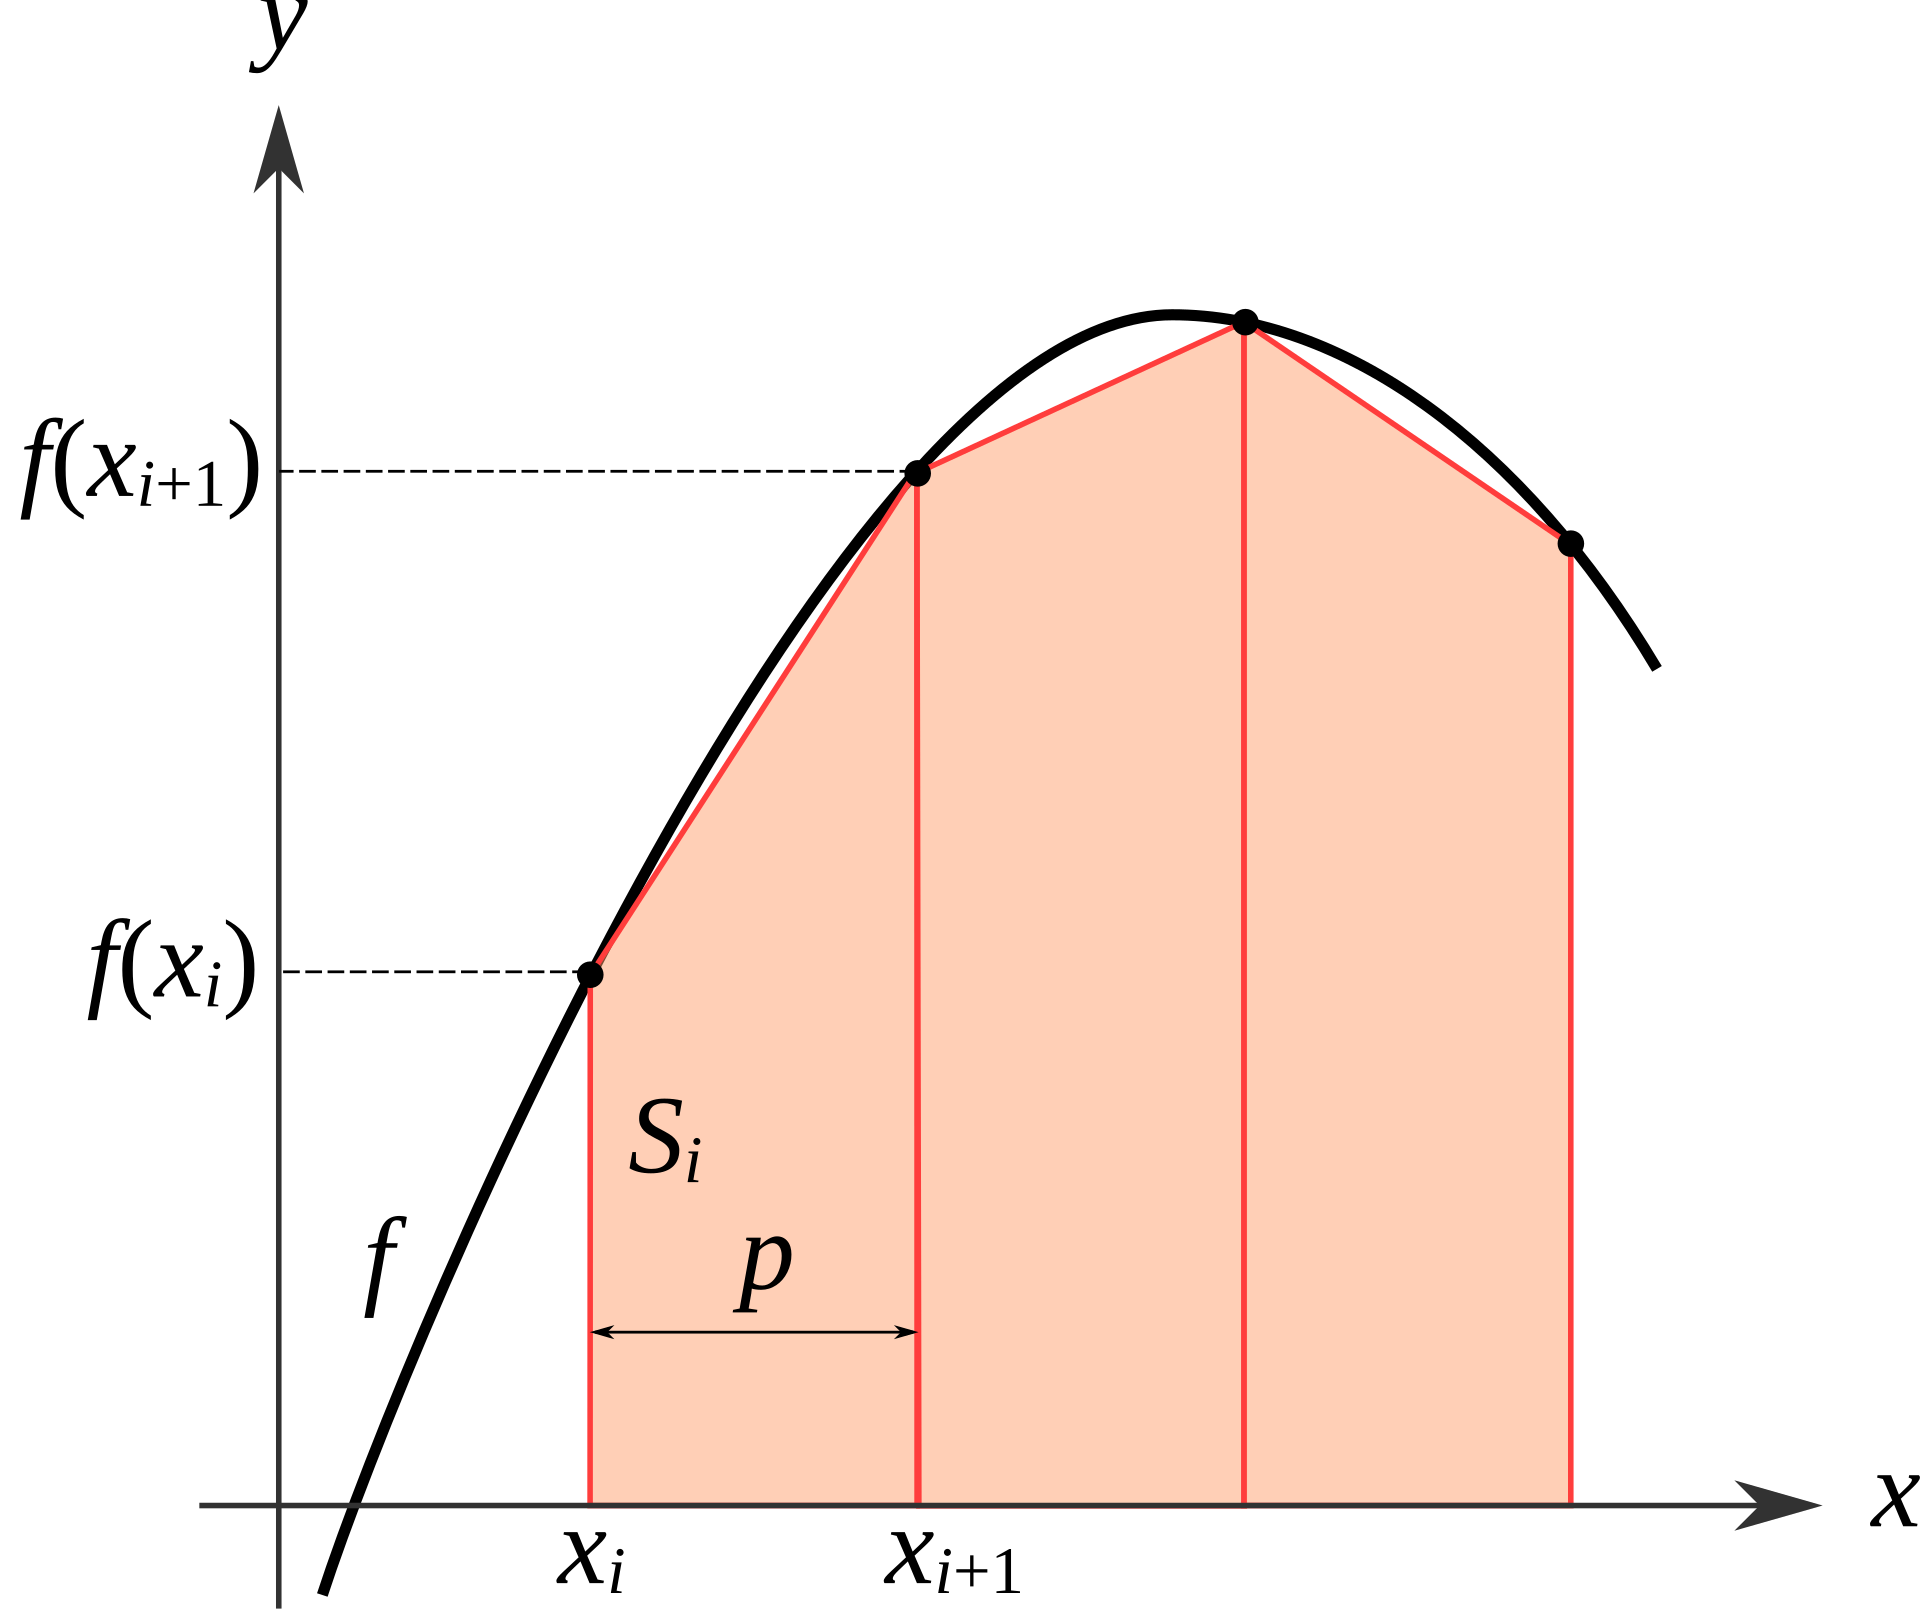

</div
>
Figur fra:<a href= "https://en.wikipedia.org/wiki/Trapezoidal_rule"> Wikipedia </a>e

Trapesmetoden virker ved å delen inn arealet under funksjonen $q(x)$ i en rekke trapeser hvor hvert enkelt trapes har et areal på $0.5*(q(x_{i+1})+q(x_i))$. Etter at vi har regnet ut arealet av alle trapesene summerer vi alle arealene og finner dermed en tilnærming av arealet under grafen. Dette arealet kjenner vi igjen som resultantkraften $R$.

\begin{equation*}
R = \int_a^b q(x) dx \approx \sum_{i=1}^n \frac{q(x_{i})+q(x_{i+1})}{2} \Delta x_i
\end{equation*}

Hvis vi skriver ut dette og antar jevn avstand mellom målingene får vi:
\begin{equation*}
R = \Delta x \sum_{i=1}^n \frac{q(x_{1})+q(x_{2})}{2} + \frac{q(x_{2})+f(x_{3})}{2} + \frac{q(x_{3})+q(x_{4})}{2} ... + \frac{q(x_{n-1})+q(x_{n})}{2}
\end{equation*}

\begin{equation*}
R = \Delta x \sum_{i=1}^n \frac{q(x_{1})}{2} + q(x_{2}) +q(x_{3}) +  ... +q(x_{n-1}) +  \frac{q(x_{n})}{2}
\end{equation*}

Og hvis endepunktene $q(x_{1})$ og $q(x_{n})$ er lik null (som i vårt tilfelle) får vi:

\begin{equation*}
R = \Delta x \sum_{i=1}^n q(x_{2}) +q(x_{3}) +  ... +q(x_{n-1}) = \Delta x \sum_{i=1}^n q(x_{i})
\end{equation*}

# Resultantkraft

<div class="alert alert-success">
Snøen virker som en fordelt last på taket. Likevel finnes det én statisk ekvivalent resultantkraft $R$, som også vi gi akkurat samme krefter i stendene. Finn denne ved hjelp av trapesmetoden og følgende uttrykk.

\begin{equation*}
R_{snø} = \Delta x \sum^n_{i=1} q(x_i)
\end{equation*}


* Finn avstanden mellom målepunktene $\Delta x$.
* Beregn resultantkraften fra linjelasten. 
* Skriv ut begge svar (print("svar")).

***
</div>

In [16]:
def R(x):
    delta_x=(x[1:2,0]-x[:1,0])
    summen=np.sum(q(x))
    R=delta_x*summen
    return R
print(R(sno_data))

[36137.6]


<div class="alert alert-block alert-info">
<details>
<summary><b> Trykk for tips til å kombinere tekst og tall, og til å runde av svar når du bruker print() </b></summary>

```python
a = 0.33333333333333
b = 0.44444444444444
print("a er tilnærmet: %.3f" % a)   # %.3f er en plassholder for et flyttall (i dette tilfellet a).
print("b er tilnærmet: %.6f" % b)   # Tallet bak %. bestemmer antall desimaler som skal skrives ut.
print("flere tall kan tas med samtidig. a=%.3f, b=%.6f" % (a,b))
print("a var orginalt", a)  

# Andre metoder som gjør det samme
print(f"flere tall kan tas med samtidig a = {a:.2e}, b = {b:.6f}")
print("flere tall kan tas med samtidig a = {:.2e}, b = {:.6f}".format(a, b)) 
```

</details>
</div>

***
# Resultantkraftens angrepslinje

<div class="alert alert-success">


For at resultantkraften skal være statisk ekvivalent med snølasten er den nødt å plasseres slik at den gir samme momentbidrag (om et vilkårlig punkt) som det linjelasten gjør.

Snølastens momentbidrag om $x=0$ kan beregnes ved å gange avstanden til hvert trapes med tilhørende areal, før bidragene til slutt summeres sammen:

\begin{equation*}
M_{snø} = \int_a^b q(x) x dx \approx \sum_{i=1}^n \frac{q(x_{i-1})+q(x_{i})}{2} x_i \Delta x \approx \Delta x \sum_i^n q(x_i)*x_i
\end{equation*}

For at momentbidragene fra snølaten og resultanten skal være like må

\begin{equation*}
R_{snø} \cdot x_R = M_{snø}
\end{equation*}

* Beregn linjelastens momentbidrag $M_{snø}$ om $x=0$.
* Beregn x-koordinaten $x_R$ hvor resultantkraften $R$ virker.

***
</div>

In [17]:
def M_sno(x):
    delta_x=(x[1:2,0]-x[:1,0])
    summen=np.sum(q(x)*x[:,0])
    sno_moment=delta_x*summen
    return sno_moment

x_R=M_sno(sno_data)/R(sno_data)
print(x_R)

[2.30163043]


****

# Belastning i stenderne

<div class="alert alert-success">


Regn ut kreftene i stenderne basert på resultantkraften ved å utføre moment og kraftlikevekt om et vilkårlig punkt (feks. venstre ende av taket).

* Ufør beregningen i kodecellen under eller regn for hånd.


***
</div>

****